In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
plt.rcParams['figure.figsize'] = [10, 5]

In [44]:
df_demog = pd.read_csv("../../../outputs/lfa/feature_csv_v1_ubx.csv").rename(columns={"Unnamed: 0": "participant_id"}).set_index("participant_id")

In [46]:
df_demog.describe()

,idle,nb_episodes,age,study_duration,first_activity_n_targets,first_activity_speed,first_activity_tracking,first_activity_probe,first_activity_radius,last_activity_n_targets,last_activity_speed,last_activity_tracking,last_activity_probe,last_activity_radius
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,5.613639,1836.136364,22.363636,1.272727,2.782727,2.981591,3.979773,10.037273,0.990136,3.803115,3.722574,4.667516,8.645959,0.852109
std,5.302108,655.924596,4.894559,0.827032,0.714711,0.503245,0.502871,1.001067,0.091542,0.899549,0.306541,0.312730,0.571006,0.061247
min,1.304444,539.000000,19.000000,0.000000,2.000000,2.295000,3.350000,8.180000,0.818000,2.000000,3.100000,4.185000,7.420000,0.742000
25%,2.546721,1495.500000,19.000000,1.000000,2.000000,2.570000,3.547500,9.242500,0.924250,3.000000,3.577500,4.406742,8.242677,0.812000
50%,3.242078,2049.000000,20.000000,1.000000,2.955000,2.800000,3.805000,10.420000,1.013000,3.885000,3.760217,4.736872,8.723028,0.841957
75%,6.581620,2329.250000,23.750000,1.000000,3.440000,3.378750,4.378750,10.872500,1.069000,4.494722,3.912500,4.851894,9.091250,0.890048
max,22.245073,2635.000000,36.000000,3.000000,3.890000,3.910000,4.910000,11.260000,1.148000,5.000000,4.290000,5.290000,9.617647,0.961765


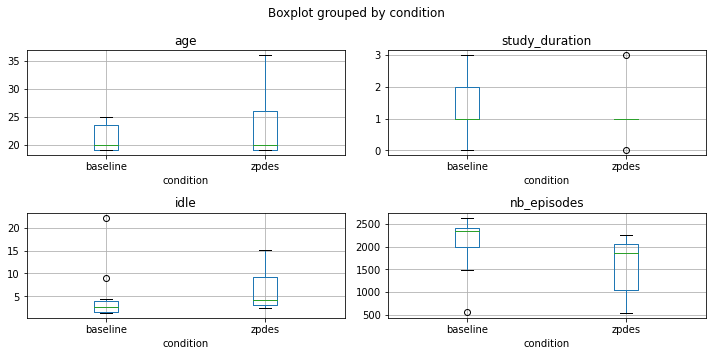

In [47]:
fig,axs = plt.subplots(2,2)
df_demog.boxplot(column=['age'], by='condition', ax=axs[0,0])
df_demog.boxplot(column=['study_duration'], by='condition', ax=axs[0,1])
df_demog.boxplot(column=['idle'], by='condition', ax=axs[1,0])
df_demog.boxplot(column=['nb_episodes'], by='condition', ax=axs[1,1])
plt.tight_layout()

In [48]:
# Simple t-test between conditions: 
# Assumption of equal variances + normality btw samples
def t_test(df, feature):
    a = df[df['condition']=='zpdes'][feature]
    b = df[df['condition']=='baseline'][feature]
    return st.ttest_ind(a=a, b=b, equal_var=True)
print(f"Age : {t_test(df, 'age')}")
print(f"Study : {t_test(df, 'study_duration')}")
print(f"Nb_episodes : {t_test(df, 'nb_episodes')}")
print(f"idle_time : {t_test(df, 'idle')}")
# Taken per feature, no differences between groups 

Age : Ttest_indResult(statistic=1.2347868483553177, pvalue=0.23122078665489595)
Study : Ttest_indResult(statistic=-1.0327955589886448, pvalue=0.31402764875411915)
Nb_episodes : Ttest_indResult(statistic=-2.0264760782808526, pvalue=0.05626006265891162)
idle_time : Ttest_indResult(statistic=0.694103505885624, pvalue=0.49560139115819135)


In [103]:
df_cr = pd.read_csv("../../../outputs/lfa/all_cognitive_results_v1_ubx.csv", index_col=0)
df_cr = df_cr.fillna(df_cr.mean())

/var/folders/fm/tjrh21s10mnbs6217l5wp52c0000gn/T/ipykernel_9327/1520685047.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cr = df_cr.fillna(df_cr.mean())


In [104]:
df_cr

,participant_id,condition,task_status,memorability_4-fa-accuracy,moteval_8-rt,memorability_2-fa-accuracy,loadblindness_total-task-accuracy,gonogo_GO-accuracy,memorability_5-rt,taskswitch_relative-switching-cost-rt,...,memorability_5-hit-accuracy,memorability_100-hit-accuracy,memorability_100-fa-accuracy,enumeration_8-accuracy,taskswitch_relative-unswitch-accuracy,taskswitch_unswitch-accuracy,gonogo_total-task-accuracy,moteval_4-accuracy,memorability_4-rt,taskswitch_parity-unswitch-accuracy
0,228,zpdes,PRE_TEST,0.062500,8611.466667,0.062500,0.750,0.68,951.444444,114.666667,...,0.562500,0.250000,0.000000,0.400000,1.000000,1.000000,0.82,0.680000,918.285714,1.000000
1,228,zpdes,POST_TEST,0.062500,4568.400000,0.187500,0.650,0.72,833.625000,196.520833,...,0.500000,0.562500,0.000000,0.250000,1.000000,0.979167,0.86,0.960000,885.583333,0.958333
2,231,baseline,PRE_TEST,0.125000,5406.533333,0.000000,0.825,0.72,854.384615,57.326923,...,0.812500,0.750000,0.000000,0.450000,1.000000,0.958333,0.86,0.760000,861.769231,0.900000
3,231,baseline,POST_TEST,0.125000,3907.733333,0.000000,0.925,0.72,778.142857,193.307692,...,0.875000,0.750000,0.000000,0.500000,0.933333,0.958333,0.86,0.760000,768.266667,0.969697
4,232,zpdes,PRE_TEST,0.187500,3004.800000,0.062500,0.500,0.72,787.153846,235.729730,...,0.812500,0.500000,0.062500,0.350000,1.000000,0.916667,0.86,0.800000,771.800000,0.885714
5,232,zpdes,POST_TEST,0.125000,3195.466667,0.062500,0.575,0.72,803.466667,-0.800000,...,0.937500,0.625000,0.062500,0.300000,0.935484,0.937500,0.86,0.706667,769.785714,0.941176
6,233,zpdes,PRE_TEST,0.108631,4118.933333,0.096726,0.425,0.72,866.630174,300.318182,...,0.800595,0.516369,0.010417,0.600000,1.000000,1.000000,0.86,0.666667,868.444855,1.000000
7,233,zpdes,POST_TEST,0.108631,3462.200000,0.096726,0.700,0.68,866.630174,127.500000,...,0.800595,0.516369,0.010417,0.700000,0.954545,0.958333,0.82,0.826667,868.444855,0.961538
8,246,baseline,PRE_TEST,0.062500,5237.066667,0.125000,0.650,0.72,885.214286,210.951220,...,0.875000,0.312500,0.062500,0.200000,1.000000,1.000000,0.86,0.680000,890.933333,1.000000
9,246,baseline,POST_TEST,0.000000,6123.733333,0.125000,0.700,0.68,927.071429,-50.385965,...,0.875000,0.687500,0.000000,0.150000,0.939394,0.937500,0.82,0.773333,931.785714,0.933333


In [109]:
# Get outcome
base = ['participant_id','condition', 'task_status'] 
conditions = [k for k in list(df_cr.keys()) if ("mot" in k) and ("rt" not in k)]
df_mot = df_cr[base + conditions]

new_df = df_mot.groupby('participant_id')[conditions].diff().dropna()
new_df['task_status'], new_df['participant_id'] = 'diff', df_mot['participant_id'].unique()
new_df['condition'] = df_mot.groupby(['participant_id', 'condition']).median().reset_index()['condition'].values

df_mot = new_df[base+conditions].drop(columns=['task_status'])
df_mot.head()

,participant_id,condition,moteval_8-accuracy,moteval_total-task-accuracy,moteval_1-accuracy,moteval_4-accuracy
1,228,zpdes,1.200000e-01,0.111111,-0.066667,0.280000
3,231,baseline,-1.333333e-02,0.000000,0.013333,0.000000
5,232,zpdes,-1.110223e-16,-0.048889,-0.053333,-0.093333
7,233,zpdes,4.000000e-02,0.084444,0.053333,0.160000
9,246,zpdes,1.333333e-02,0.057778,0.066667,0.093333


In [111]:
df_mot[df_mot['condition']=='zpdes'].describe()

,participant_id,moteval_8-accuracy,moteval_total-task-accuracy,moteval_1-accuracy,moteval_4-accuracy
count,11.000000,11.000000,11.000000,1.100000e+01,11.000000
mean,256.636364,0.050909,0.085657,8.969697e-02,0.116364
std,19.576888,0.054591,0.093568,2.199871e-01,0.110448
min,228.000000,-0.013333,-0.048889,-6.666667e-02,-0.093333
25%,239.500000,0.006667,0.042222,1.110223e-16,0.053333
50%,263.000000,0.040000,0.080000,4.000000e-02,0.133333
75%,271.000000,0.080000,0.104444,8.000000e-02,0.173333
max,281.000000,0.160000,0.328889,7.333333e-01,0.280000


In [112]:
df_mot[df_mot['condition']=='baseline'].describe()

,participant_id,moteval_8-accuracy,moteval_total-task-accuracy,moteval_1-accuracy,moteval_4-accuracy
count,11.000000,11.000000,11.000000,11.000000,11.000000
mean,257.090909,0.020606,0.033131,-0.001212,0.080000
std,14.875850,0.051765,0.031450,0.031808,0.066933
min,231.000000,-0.026667,0.000000,-0.053333,0.000000
25%,250.500000,-0.006667,0.011111,-0.020000,0.033333
50%,260.000000,0.000000,0.022222,0.000000,0.080000
75%,266.500000,0.040000,0.048889,0.013333,0.120000
max,277.000000,0.160000,0.097778,0.053333,0.213333


In [ ]:
# From outcome interraction plot to see the difference btw zpdes and baseline?


In [ ]:
# Then try to fit a model w demog to predict a 3D array with 
# Create X = [[feature_vect_indiv_0],[feature_vect_indiv_1]] , Y = [[outcome_vect_indiv_0], [outcome_vect_indiv_1]]
